# Data Analysis on Google Apps Dataset
### The link for the dataset- https://raw.githubusercontent.com/DivyaThakur24/GoogleAppRating-DataAnalysis/master/googleplaystore.csv

In [2]:
#Importing the necessary libraries which will be required for Analysis of dataset
import pandas as pd #Helps in DataFrames for Analysis
import numpy as np #Numpy is used for Numerical computation
import matplotlib.pyplot as plt # This library is used for Creating graphs
import seaborn as sns # Even seaborn is used for visualization, its like a addon for graphs created by matplotlib
%matplotlib inline

In [3]:
#Reading the Dataset as CSV, the data is seperated by a ',' 
#It is read using Pandas, pandas creates a DataFrame which helps giving a better view of the dataset
df= pd.read_csv('https://raw.githubusercontent.com/DivyaThakur24/GoogleAppRating-DataAnalysis/master/googleplaystore.csv',sep=',')

In [4]:
#pd.head() is used to Displays the first 5 rows and columns for the dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [36]:
#pd.info() summaries the dataset by lisitng out column names, number of rows , Non-null count(number non-empty values) and Dtype(types of datatype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


In [5]:
#pd.describe() -Gives the detailed count, mean, std in short- statistical details of Numerical value from the dataset
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


###### As we have only Rating as Numerical , we get statistical detail of Rating, 
###### we can say that Rating as total 9367 values, mean(Avg) 4.19 value, standard devitation of 0.53 and so on

<AxesSubplot:>

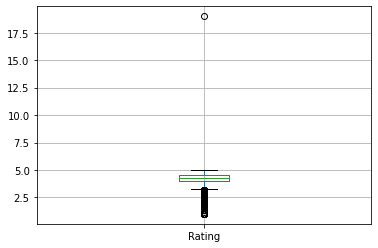

In [6]:
#Creating a boxplot to understand the Rating column more better.
df.boxplot()


###### We can clearly see that there is one outlier in Rating column, we will deal with this outlier later

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

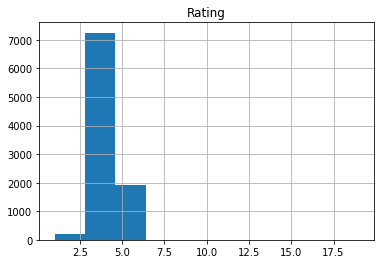

In [7]:
#Similarly creating a histogram to understand the Rating column
df.hist()

In [49]:
#Creates a whole dataset in Boolean format, Showing whether the column contains Null or not
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
#For better display and understanding we can display the total(sum) of NULL value in dataset, just by adding .sum() method
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Handling the outlier
##### As we have noticed in boxplot there was one outlier in Rating Column, Now since we notice most of the value is around 1 to 5
##### we can select the value greater then 5, which gives us the outlier

In [9]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


###### we have only one row with Rating above 5, now we can either replace the value with mean, or try other method or just drop the entire row
###### we are not sure whether other values in the row are accurate, so we are just dropping the row

In [10]:
#.drop() drops the row 1047 , inplace indicates that the changes are directly made to the original datasete
df.drop([10472],inplace=True)

In [11]:
#just for verification we display the row from 10470 and 10475
df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


<AxesSubplot:>

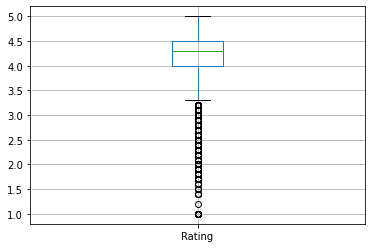

In [60]:
#Creating a boxplot for the modified dataset
df.boxplot()

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

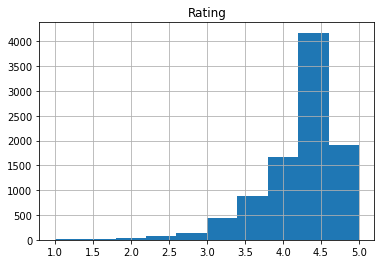

In [61]:
df.hist()
#As we can notice that data is Right Screwed so for futher calculations we will be using median value

In [62]:
#Here we are creating Thersold for our dataset, we will be dropping all the value that are above our thersold value
#We can considering 10% of the dataset value as thersold
thresold=len(df)*0.1 #10% of dataset that is 1084
thresold

1084.0

In [63]:
#Applying the thersold to our dataset
df.dropna(thresh=thresold,axis=1,inplace=True) #axis=1 droping column

In [65]:
df.shape
#since none of the value are above our thersold, none of the value gets drops

(10840, 13)

### Now we will fill the NA, with median value 

In [66]:
#This function will replace or fill NA with median value
def compute_median(series):
    return series.fillna(series.median())

In [67]:
df.Rating= df['Rating'].transform(compute_median) #calling the function

In [70]:
#verifing the update
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

###### filling NA of catergorical values by mode value

In [78]:
print(df['Type'].mode()) #taking mode of Type column
print(df['Current Ver'].mode())#taking mode of Current Ver column
print(df['Android Ver'].mode())#taking mode of Android Ver column

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


###### Mode of Type column is 'Free'
###### Mode of Current Ver column is 'Varies with device'
###### Mode of Android Ver column is '4.1 and up'

In [80]:
#Filling NA of these columns by mode values, here we are using fillna() method
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]),inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]),inplace=True)

In [81]:
# Checking the dataset for updated result
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Converting Price, Reviews and Rating into Numerical

In [82]:

df['Price']=df['Price'].apply(lambda x: str(x).replace('$','')if '$' in str(x) else str(x)) #we will replacing '$' with ''
df['Price']=df['Price'].apply(lambda x:float(x)) #converting the data type to float
df['Reviews']=pd.to_numeric(df['Reviews'],errors='coerce')

#here lambda function is used, its like a mini or one line function

In [83]:
df.info()
# As you can observe in the output that Price is now a 'float' type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 762.2+ KB


In [86]:
# Similarly the code for converting 'Install' column to float
df['Installs']=df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x:str(x).replace(',','') if ',' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x:float(x))

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 804.5+ KB


In [88]:
df.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


In [89]:
df.describe() #central limit therom

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [97]:
# Here we will displaying the various categories of apps based on Rating, Price and Reviews

grp= df.groupby('Category')
x=grp['Rating'].agg(np.mean)
y=grp['Price'].agg(np.sum)
z=grp['Reviews'].agg(np.mean)
print('----------\nRating:\n------')
print(x)
print('----------\nPrice:\n-----')
print(y)
print('----------\nReviews:\n-----')
print(x)

----------
Rating:
------
Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVE

## Data Visualization

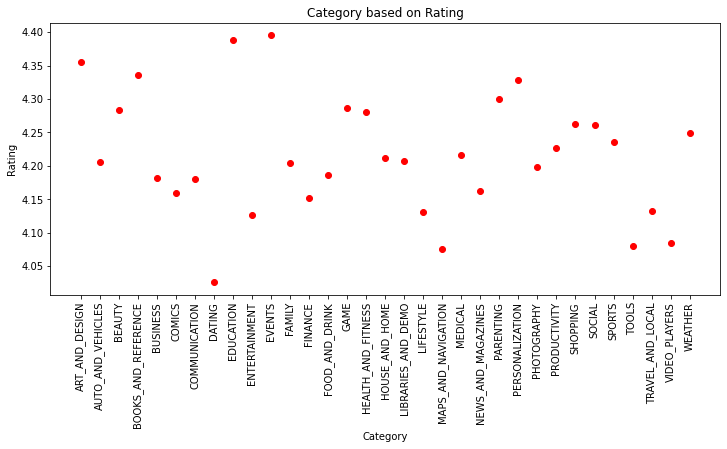

In [104]:
# A simple scatterplot of Rating of apps
# Here we are using pyplot from matplotlib 

plt.figure(figsize=(12,5))
plt.plot(x,'ro')
plt.xticks(rotation=90)
plt.title('Category based on Rating')
plt.xlabel('Category') 
plt.ylabel('Rating')
plt.show()

##### From the Graph we can observe that most Rated Apps are of 'Events' and 'Education' Category

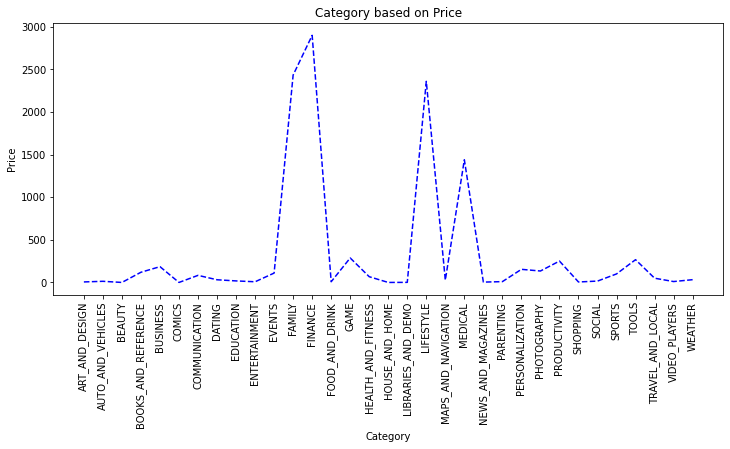

In [107]:
# A simple plot for Price columns
plt.figure(figsize=(12,5))
plt.plot(y,'--',color='b') #Here instead of circls(dot) with represent using dotted line --
plt.xticks(rotation=90)
plt.title('Category based on Price')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()

##### Here we can observe that Finance based apps are Priced high, where as Lifestyle and Medical comes second and third highly price apps

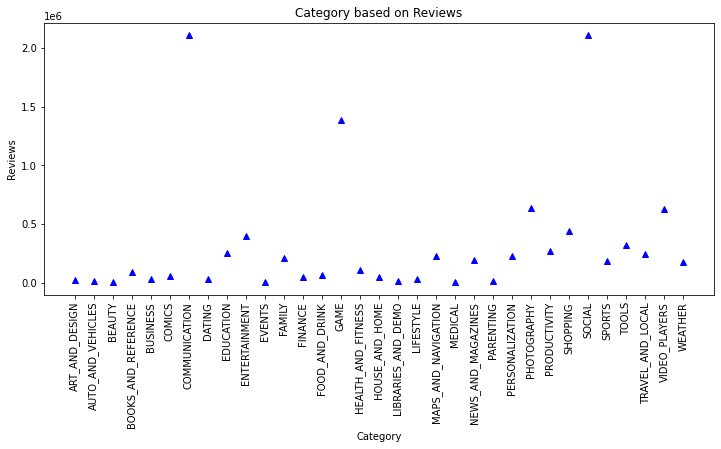

In [110]:
# Similar plot for Reviews column
plt.figure(figsize=(12,5))
plt.plot(z,'^',color='b') #here the values are represented as triangles
plt.xticks(rotation=90) 
plt.title('Category based on Reviews')
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.show()

#### Here we can observe that Apps of Category 'Communcation', 'Social', and 'Game' have better Reviews compared to other categories of Apps